In [1]:
from sklearn.externals import joblib
import pandas as pd
from os.path import join
import sys
sys.path.append('../src')
from transforms import *
from config import *

# Chosen models

In [2]:
SENSORA = 'HOS_mlp'
SENSORV_union = 'HOS_mlp'
SENSORV_appended = 'HOS_mlp'
SENSORC_union = 'FOURIER_mlp'
SENSORC_appended = 'FOURIER_mlp'

experiments = ['SENSORA/appended', 'SENSORV/union', 'SENSORV/appended', 'SENSORC/union', 'SENSORC/appended']

metrics = ['acc', 'fpr_weighted', 'fnr_weighted']

In [3]:
def get_results_filename(model_name='HOS_mlp'):
    results_names = []
    for m in metrics:
        results_names.append(model_name + '_' + m + '.pkl')
    
    return results_names

In [4]:
get_results_filename()

['HOS_mlp_acc.pkl', 'HOS_mlp_fpr_weighted.pkl', 'HOS_mlp_fnr_weighted.pkl']

# Load results

### Axial flux sensor

In [5]:
results_folder = join('..', 'results', experiments[0], 'pkl')
fnames = get_results_filename(model_name=SENSORA)
print('Loading experiment: {}'.format(results_folder))
print('fnames: {}'.format(fnames))
SENSORA_APPENDED_ACC = joblib.load(join(results_folder, fnames[0]))
SENSORA_APPENDED_FPR = joblib.load(join(results_folder, fnames[1]))
SENSORA_APPENDED_FNR = joblib.load(join(results_folder, fnames[2]))

Loading experiment: ../results/SENSORA/appended/pkl
fnames: ['HOS_mlp_acc.pkl', 'HOS_mlp_fpr_weighted.pkl', 'HOS_mlp_fnr_weighted.pkl']


### Vibration sensor

In [6]:
results_folder = join('..', 'results', experiments[1], 'pkl')
fnames = get_results_filename(model_name=SENSORV_union)
print('Loading experiment: {}'.format(results_folder))
print('fnames: {}'.format(fnames))
SENSORV_UNION_ACC = joblib.load(join(results_folder, fnames[0]))
SENSORV_UNION_FPR = joblib.load(join(results_folder, fnames[1]))
SENSORV_UNION_FNR = joblib.load(join(results_folder, fnames[2]))

results_folder = join('..', 'results', experiments[2], 'pkl')
fnames = get_results_filename(model_name=SENSORV_appended)
print('Loading experiment: {}'.format(results_folder))
print('fnames: {}'.format(fnames))
SENSORV_APPENDED_ACC = joblib.load(join(results_folder, fnames[0]))
SENSORV_APPENDED_FPR = joblib.load(join(results_folder, fnames[1]))
SENSORV_APPENDED_FNR = joblib.load(join(results_folder, fnames[2]))

Loading experiment: ../results/SENSORV/union/pkl
fnames: ['HOS_mlp_acc.pkl', 'HOS_mlp_fpr_weighted.pkl', 'HOS_mlp_fnr_weighted.pkl']
Loading experiment: ../results/SENSORV/appended/pkl
fnames: ['HOS_mlp_acc.pkl', 'HOS_mlp_fpr_weighted.pkl', 'HOS_mlp_fnr_weighted.pkl']


### Current sensor

In [7]:
results_folder = join('..', 'results', experiments[3], 'pkl')
fnames = get_results_filename(model_name=SENSORC_union)
print('Loading experiment: {}'.format(results_folder))
print('fnames: {}'.format(fnames))
SENSORC_UNION_ACC = joblib.load(join(results_folder, fnames[0]))
SENSORC_UNION_FPR = joblib.load(join(results_folder, fnames[1]))
SENSORC_UNION_FNR = joblib.load(join(results_folder, fnames[2]))

results_folder = join('..', 'results', experiments[4], 'pkl')
fnames = get_results_filename(model_name=SENSORC_appended)
print('Loading experiment: {}'.format(results_folder))
print('fnames: {}'.format(fnames))
SENSORC_APPENDED_ACC = joblib.load(join(results_folder, fnames[0]))
SENSORC_APPENDED_FPR = joblib.load(join(results_folder, fnames[1]))
SENSORC_APPENDED_FNR = joblib.load(join(results_folder, fnames[2]))

Loading experiment: ../results/SENSORC/union/pkl
fnames: ['FOURIER_mlp_acc.pkl', 'FOURIER_mlp_fpr_weighted.pkl', 'FOURIER_mlp_fnr_weighted.pkl']
Loading experiment: ../results/SENSORC/appended/pkl
fnames: ['FOURIER_mlp_acc.pkl', 'FOURIER_mlp_fpr_weighted.pkl', 'FOURIER_mlp_fnr_weighted.pkl']


## Build the DataFrame

In [8]:
df = pd.DataFrame(index=experiments, columns=metrics)
df

,acc,fpr_weighted,fnr_weighted
SENSORA/appended,NaN,NaN,NaN
SENSORV/union,NaN,NaN,NaN
SENSORV/appended,NaN,NaN,NaN
SENSORC/union,NaN,NaN,NaN
SENSORC/appended,NaN,NaN,NaN


In [9]:
df = pd.DataFrame(index=experiments, columns=metrics)
df.loc['SENSORA/appended']['acc'] = SENSORA_APPENDED_ACC
df.loc['SENSORA/appended']['fpr_weighted'] = SENSORA_APPENDED_FPR
df.loc['SENSORA/appended']['fnr_weighted'] = SENSORA_APPENDED_FNR

df.loc['SENSORV/union']['acc'] = SENSORV_UNION_ACC
df.loc['SENSORV/union']['fpr_weighted'] = SENSORV_UNION_FPR
df.loc['SENSORV/union']['fnr_weighted'] = SENSORV_UNION_FNR
df.loc['SENSORV/appended']['acc'] = SENSORV_APPENDED_ACC
df.loc['SENSORV/appended']['fpr_weighted'] = SENSORV_APPENDED_FPR
df.loc['SENSORV/appended']['fnr_weighted'] = SENSORV_APPENDED_FNR

df.loc['SENSORC/union']['acc'] = SENSORC_UNION_ACC
df.loc['SENSORC/union']['fpr_weighted'] = SENSORC_UNION_FPR
df.loc['SENSORC/union']['fnr_weighted'] = SENSORC_UNION_FNR
df.loc['SENSORC/appended']['acc'] = SENSORC_APPENDED_ACC
df.loc['SENSORC/appended']['fpr_weighted'] = SENSORC_APPENDED_FPR
df.loc['SENSORC/appended']['fnr_weighted'] = SENSORC_APPENDED_FNR

df.head()

,acc,fpr_weighted,fnr_weighted
SENSORA/appended,"[0.6666666666666666, 0.7666666666666667, 0.666...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.8324999999999999, ...","[0.0, 0.0, 0.0, 0.0, 1.6675, 1.39, 1.19, 1.042..."
SENSORV/union,"[0.9, 0.8666666666666667, 0.8, 0.7241379310344...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
SENSORV/appended,"[0.8292682926829268, 0.7682926829268293, 0.853...","[0.0, 0.4995, 0.666, 0.4995, 0.400499999999999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.195, 0.3405, ..."
SENSORC/union,"[0.8709677419354839, 0.8709677419354839, 0.838...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
SENSORC/appended,"[0.7619047619047619, 0.5595238095238095, 0.607...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Employ one way ANOVA and ad-hoc paired Tukey HSD test

In [10]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_and_tukey(df, metric='acc'):
    def get_df_metric(df, metric='acc'):
        return pd.DataFrame.from_items(zip(df[metric].index, df[metric].values))

    new_df = get_df_metric(df, metric)
    fvalue, pvalue =stats.f_oneway(new_df['SENSORA/appended'], new_df['SENSORV/union'], new_df['SENSORV/appended'], 
              new_df['SENSORC/union'], new_df['SENSORC/appended'])
    
    # reshape the d dataframe suitable for statsmodels package 
    d_melt = pd.melt(new_df.reset_index(), id_vars=['index'], value_vars=experiments)
    # replace column names
    d_melt.columns = ['index', 'sensor', 'value']
    # Ordinary Least Squares (OLS) model
    model = ols('value ~ C(sensor)', data=d_melt).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    from statsmodels.sandbox.stats.multicomp import TukeyHSDResults
    from statsmodels.stats.libqsturng import psturng
    # perform multiple pairwise comparison (Tukey HSD)
    m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['sensor'], alpha=0.05)
    pvalues = psturng(np.abs(m_comp.meandiffs / m_comp.std_pairs), len(m_comp.groupsunique), m_comp.df_total)
    
    return anova_table, m_comp, pvalues

/home/navar/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### For ACC

In [11]:
anova_acc, m, pvalues = anova_and_tukey(df, 'acc')
anova_acc

/home/navar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  import sys


,sum_sq,df,F,PR(>F)
C(sensor),1.822731,4.0,106.533613,1.927962e-52
Residual,1.047954,245.0,NaN,NaN


In [12]:
m.summary()

group1,group2,meandiff,lower,upper,reject
SENSORA/appended,SENSORC/appended,-0.0026,-0.0386,0.0333,False
SENSORA/appended,SENSORC/union,0.2055,0.1696,0.2415,True
SENSORA/appended,SENSORV/appended,0.1566,0.1206,0.1925,True
SENSORA/appended,SENSORV/union,0.1399,0.1039,0.1758,True
SENSORC/appended,SENSORC/union,0.2081,0.1722,0.2441,True
SENSORC/appended,SENSORV/appended,0.1592,0.1233,0.1951,True
SENSORC/appended,SENSORV/union,0.1425,0.1066,0.1785,True
SENSORC/union,SENSORV/appended,-0.0489,-0.0849,-0.013,True
SENSORC/union,SENSORV/union,-0.0656,-0.1016,-0.0297,True
SENSORV/appended,SENSORV/union,-0.0167,-0.0526,0.0193,False


In [13]:
pvalues

array([0.9       , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.00211188, 0.001     , 0.68187907])

### For FPR-W and FNR-W

In [14]:
anova_fpr, m, pvalues = anova_and_tukey(df, 'fpr_weighted')
anova_fpr

/home/navar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  import sys


,sum_sq,df,F,PR(>F)
C(sensor),2.786493,4.0,74.223142,3.996908e-41
Residual,2.299454,245.0,NaN,NaN


In [15]:
m.summary()

group1,group2,meandiff,lower,upper,reject
SENSORA/appended,SENSORC/appended,-0.2339,-0.2872,-0.1807,True
SENSORA/appended,SENSORC/union,-0.2339,-0.2872,-0.1807,True
SENSORA/appended,SENSORV/appended,0.0015,-0.0518,0.0547,False
SENSORA/appended,SENSORV/union,-0.1452,-0.1984,-0.0919,True
SENSORC/appended,SENSORC/union,0.0,-0.0532,0.0532,False
SENSORC/appended,SENSORV/appended,0.2354,0.1822,0.2887,True
SENSORC/appended,SENSORV/union,0.0888,0.0356,0.142,True
SENSORC/union,SENSORV/appended,0.2354,0.1822,0.2887,True
SENSORC/union,SENSORV/union,0.0888,0.0356,0.142,True
SENSORV/appended,SENSORV/union,-0.1466,-0.1999,-0.0934,True


In [16]:
pvalues

array([0.001, 0.001, 0.9  , 0.001, 0.9  , 0.001, 0.001, 0.001, 0.001,
       0.001])

In [17]:
anova_fnr, m, pvalues = anova_and_tukey(df, 'fnr_weighted')
anova_fnr

/home/navar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  import sys


,sum_sq,df,F,PR(>F)
C(sensor),19.600823,4.0,254.396707,5.850120e-86
Residual,4.719206,245.0,NaN,NaN


In [18]:
m.summary()

group1,group2,meandiff,lower,upper,reject
SENSORA/appended,SENSORC/appended,-0.7378,-0.814,-0.6615,True
SENSORA/appended,SENSORC/union,-0.7413,-0.8176,-0.665,True
SENSORA/appended,SENSORV/appended,-0.6096,-0.6858,-0.5333,True
SENSORA/appended,SENSORV/union,-0.6689,-0.7452,-0.5926,True
SENSORC/appended,SENSORC/union,-0.0035,-0.0798,0.0727,False
SENSORC/appended,SENSORV/appended,0.1282,0.0519,0.2045,True
SENSORC/appended,SENSORV/union,0.0688,-0.0074,0.1451,False
SENSORC/union,SENSORV/appended,0.1317,0.0555,0.208,True
SENSORC/union,SENSORV/union,0.0724,-0.0039,0.1487,False
SENSORV/appended,SENSORV/union,-0.0594,-0.1356,0.0169,False


In [19]:
pvalues

array([0.001     , 0.001     , 0.001     , 0.001     , 0.9       ,
       0.001     , 0.09848026, 0.001     , 0.07225947, 0.20723816])

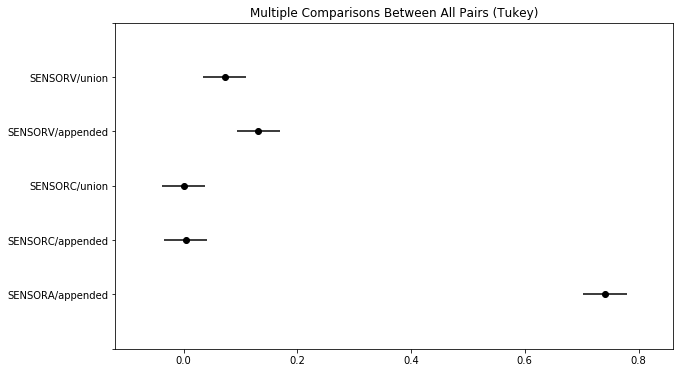

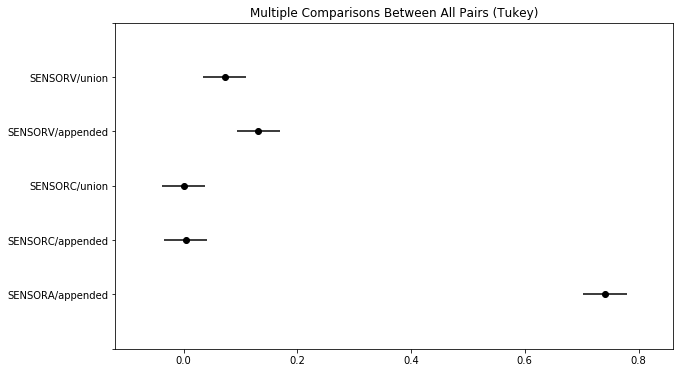

In [36]:
m.plot_simultaneous()

# Employ the paired Hypohesis test of Kolmogorov-Smirnov

In [20]:
h_table_acc = pd.DataFrame(index=experiments, columns=experiments)
h_table_fpr = pd.DataFrame(index=experiments, columns=experiments)
h_table_fnr = pd.DataFrame(index=experiments, columns=experiments)

In [21]:
from scipy import stats

In [22]:
def ks_test_groups(df, htable, metric):
    max_idx = df.shape[0]
    for e in range(0, max_idx):
        idx = 0
        exp1 = df.iloc[e]
        for e2 in range(0, max_idx):
            exp2 = df.iloc[e2]
#             print("E1: {}".format(exp1.name))
#             print("E2: {}".format(exp2.name))
#             print('=======')
            g = df.loc[exp1.name][metric]
            f = df.loc[exp2.name][metric]
            htable.loc[exp1.name][exp2.name] = stats.ks_2samp(g, f).pvalue
            
    return htable

### For ACC

In [23]:
r = ks_test_groups(df, htable=h_table_acc, metric='acc')
r

,SENSORA/appended,SENSORV/union,SENSORV/appended,SENSORC/union,SENSORC/appended
SENSORA/appended,1,1.98244e-10,7.22665e-16,1.24876e-16,0.507658
SENSORV/union,1.98244e-10,1,0.154629,0.000423183,4.00889e-15
SENSORV/appended,7.22665e-16,0.154629,1,0.000177784,1.01999e-20
SENSORC/union,1.24876e-16,0.000423183,0.000177784,1,1.36742e-21
SENSORC/appended,0.507658,4.00889e-15,1.01999e-20,1.36742e-21,1


### For FPR

In [24]:
r = ks_test_groups(df, htable=h_table_fpr, metric='fpr_weighted')
r

,SENSORA/appended,SENSORV/union,SENSORV/appended,SENSORC/union,SENSORC/appended
SENSORA/appended,1,3.76175e-08,0.000965589,4.9988e-19,4.9988e-19
SENSORV/union,3.76175e-08,1,7.22665e-16,2.13176e-14,2.13176e-14
SENSORV/appended,0.000965589,7.22665e-16,1,1.75725e-22,1.75725e-22
SENSORC/union,4.9988e-19,2.13176e-14,1.75725e-22,1,1
SENSORC/appended,4.9988e-19,2.13176e-14,1.75725e-22,1,1


### For FNR

In [25]:
r = ks_test_groups(df, htable=h_table_fnr, metric='fnr_weighted')
r

,SENSORA/appended,SENSORV/union,SENSORV/appended,SENSORC/union,SENSORC/appended
SENSORA/appended,1,7.29318e-20,7.29318e-20,7.29318e-20,7.29318e-20
SENSORV/union,7.29318e-20,1,1.25605e-07,4.8053e-11,4.8053e-11
SENSORV/appended,7.29318e-20,1.25605e-07,1,3.2843e-18,3.2843e-18
SENSORC/union,7.29318e-20,4.8053e-11,3.2843e-18,1,0.840948
SENSORC/appended,7.29318e-20,4.8053e-11,3.2843e-18,0.840948,1
